In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [2]:
import os
names = [f for f in os.listdir("./") if f.endswith(".csv")]
names

['credits.csv',
 'keywords.csv',
 'links.csv',
 'links_small.csv',
 'movies_metadata.csv',
 'ratings.csv',
 'ratings_small.csv']

In [4]:
dataset_list = {}
for name in names:
    print(name)
    if name == 'ratings.csv':
        continue
    dataset_list[name.split('.')[0]] = pd.read_csv(name, low_memory=False)

credits.csv
keywords.csv
links.csv
links_small.csv
movies_metadata.csv
ratings.csv
ratings_small.csv


In [8]:
ratings = dataset_list["ratings_small"]
ratings.columns
ratings.movieId.unique().size

9066

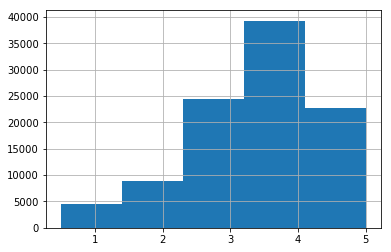

In [26]:
ratings.rating.hist(bins = 5);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x189DF870>]], dtype=object)

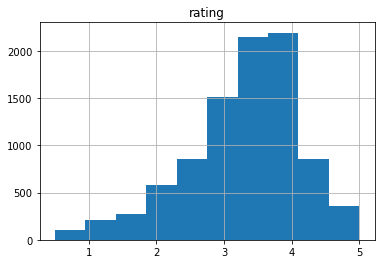

In [29]:
"""
SELECT MEAN(rating) AS rating FROM ratings
GROUPBY movieId
B SQL
"""
def roundf(x):
    return round(x,1)
ratings.groupby(["movieId"])[["rating"]].mean().apply(roundf).hist()

In [30]:
del ratings["timestamp"]

In [32]:
umt = ratings.pivot(index="userId", columns = "movieId", values="rating")

In [34]:
umtfull = umt.fillna(0)

In [41]:
def get_similar_user(user):
    u1 = umtfull.loc[user].values
    dist = []
    for i, row in umtfull.iterrows():
        if i == user:
            continue
        u2 = row
        d = np.linalg.norm(u1 - u2)
        dist.append((d,i))
    dist.sort()
    for j in dist[:10]:
        print(j[1])
get_similar_user(4)

137
7
206
167
337
326
395
180
221
108
